# Storytelling with Open Data and Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

print(sys.version)

3.6.2 |Anaconda custom (64-bit)| (default, Jul 20 2017, 13:51:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


#### About this dataset: https://www1.toronto.ca/wps/portal/contentonly?vgnextoid=4224640a430cd410VgnVCM10000071d60f89RCRD&vgnextchannel=1a66e03bb8d1e310VgnVCM10000071d60f89RCRD

In [2]:
df = pd.read_csv("http://opendata.toronto.ca/clerk/epolling/epolling_csv.zip")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 24 columns):
POLL_ID                          553 non-null int64
POLL_CD                          553 non-null object
APPLICATION_FOR                  553 non-null object
ADDRESS                          410 non-null object
OPEN_DATE                        553 non-null object
CLOSE_DATE                       553 non-null object
POTENTIAL_VOTERS                 553 non-null int64
DECLARATIONS_ADDED               553 non-null int64
FINAL_VOTER_COUNT                553 non-null int64
BALLOTS_DISTRIBUTED              553 non-null int64
BALLOTS_RETURNED_TO_SENDER       553 non-null int64
BALLOTS_RECEIVED_BY_VOTERS       553 non-null int64
BALLOTS_NEEDED_TO_PROCEED_LBL    553 non-null object
BALLOTS_NEEDED_TO_PROCEED        553 non-null int64
BALLOTS_CAST                     553 non-null int64
RESPONSE_RATE_MET                553 non-null object
BALLOTS_IN_FAVOUR                553 non-null int64
BALL

In [4]:
df.head()

,POLL_ID,POLL_CD,APPLICATION_FOR,ADDRESS,OPEN_DATE,CLOSE_DATE,POTENTIAL_VOTERS,DECLARATIONS_ADDED,FINAL_VOTER_COUNT,BALLOTS_DISTRIBUTED,...,BALLOTS_CAST,RESPONSE_RATE_MET,BALLOTS_IN_FAVOUR,BALLOTS_OPPOSED,BALLOTS_SPOILED,BALLOTS_BLANK,PASS_RATE_LABEL,PASS_RATE,POLL_RESULT,MORATORIUM_DATE
0,170,FYP 2015-104,Front Yard Parking,8 Brumell Ave,2015/05/01,2015/05/31,41,0,34,34,...,18,Yes,16,1,1,0,50% + 1 of received ballots,10.0,In Favour,2018/06/01
1,172,FYP 2015-106,Front Yard Parking,90 Belsize Dr,2015/05/04,2015/06/03,40,0,36,36,...,30,Yes,30,0,0,0,50% + 1 of received ballots,16.0,In Favour,2018/06/04
2,176,TCP 2015-110,Traffic Calming,NaN,2015/05/06,2015/06/04,379,0,334,334,...,137,No,101,31,5,0,60% of received ballots,NaN,Response Rate Not Met,2017/06/05
3,177,BCP 2015-111,Boulevard Cafe,889 Queen St E,2015/05/06,2015/06/05,120,0,106,106,...,30,Yes,19,10,1,0,50% + 1 of received ballots,16.0,In Favour,2017/06/06
4,179,CBP 2015-113,Commercial Boulevard Parking,1747 Eglinton Ave W,2015/05/11,2015/06/09,333,0,235,235,...,26,No,13,11,2,0,50% + 1 of received ballots,NaN,Response Rate Not Met,2017/06/10


In [5]:
df.tail()

,POLL_ID,POLL_CD,APPLICATION_FOR,ADDRESS,OPEN_DATE,CLOSE_DATE,POTENTIAL_VOTERS,DECLARATIONS_ADDED,FINAL_VOTER_COUNT,BALLOTS_DISTRIBUTED,...,BALLOTS_CAST,RESPONSE_RATE_MET,BALLOTS_IN_FAVOUR,BALLOTS_OPPOSED,BALLOTS_SPOILED,BALLOTS_BLANK,PASS_RATE_LABEL,PASS_RATE,POLL_RESULT,MORATORIUM_DATE
548,793,TCP 2017-185,Traffic Calming,NaN,2017/11/09,2017/12/09,114,0,107,107,...,58,Yes,34,24,0,0,60% of received ballots,35.0,Opposed,2019/12/10
549,796,FYP 2017-188,Front Yard Parking,33 Church St (York),2017/11/09,2017/12/09,78,0,28,28,...,5,No,5,0,0,0,50% + 1 of received ballots,NaN,Response Rate Not Met,2020/12/10
550,794,TCP 2017-186,Traffic Calming,NaN,2017/11/09,2017/12/09,13,0,10,10,...,3,No,3,0,0,0,60% of received ballots,NaN,Response Rate Not Met,2019/12/10
551,795,TCP 2017-187,Traffic Calming,NaN,2017/11/13,2017/12/13,82,0,73,73,...,53,Yes,29,23,1,0,60% of received ballots,32.0,Opposed,2019/12/14
552,797,FYP 2017-189,Front Yard Parking,128 Cameron Ave (York),2017/11/13,2017/12/13,99,0,79,79,...,52,Yes,45,0,7,0,50% + 1 of received ballots,27.0,In Favour,2020/12/14


In [6]:
df = df.sort_values('APPLICATION_FOR', ascending=True)

In [7]:
# df.DATE = pd.to_datetime(df.DATE)

In [8]:
plt.rcParams['figure.figsize']=(6,5)

In [9]:
plt.figure()

In [10]:
sns.set(font_scale=1.25)

In [11]:
# plt.axis("off")

In [12]:
# ax = sns.barplot(y="establishment_name", x="suspension_length_days", data=df_2017, ci=None, palette="Blues_d")

In [13]:
ax = sns.countplot(y="APPLICATION_FOR", data=df, palette="Blues_d")

In [14]:
plt.title('City of Toronto Polls Conducted\n for Public Feedback 2015-2017', fontsize=15)

Text(0.5,1,'City of Toronto Polls Conducted\n for Public Feedback 2015-2017')

In [15]:
plt.xlabel('Count')

Text(0.5,0,'Count')

In [16]:
plt.ylabel(' ')

Text(0,0.5,' ')

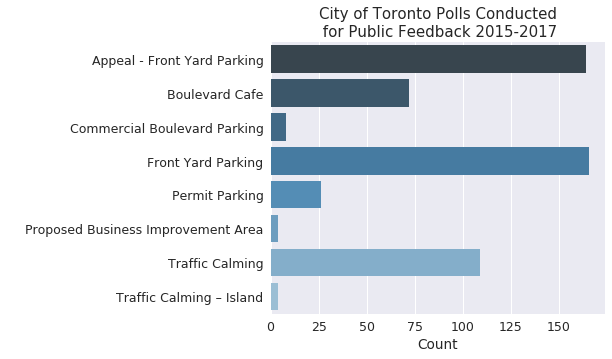

In [17]:
plt.show()